# Forecasting Crypto

Write description Here with steps.
## Step 1: Find Unusual Patterns in Hourly Google Search Traffic
## Step 2: Mine the Search Traffic Data for Seasonality
## Step 3: Relate the Search Traffic to Stock Price Patterns
## Step 4: Create a Time Series Model with Prophet
## Step 5 (Optional): Forecast Revenue by Using Time Series Models

## Install and import the required libraries and dependencies

In [107]:
# Install the required libraries
from IPython.display import clear_output
try:
  !pip install pystan
  !pip install fbprophet
  !pip install hvplot
  !pip install holoviews
except:
  print("Error installing libraries")
finally:
  clear_output()
  print('Libraries successfully installed')

Libraries successfully installed


In [108]:
# Import the required libraries and dependencies
import pandas as pd
import numpy as np
import holoviews as hv
from fbprophet import Prophet
import hvplot.pandas
import datetime as dt
%matplotlib inline

## Step 1: 

Description:

In [110]:
# Upload the "google_hourly_search_trends.csv" file into Colab, then store in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

from google.colab import files
uploaded = files.upload()

# df_mercado_trends = pd.read_csv("google_hourly_search_trends.csv")

df_crypto_data = pd.read_csv(
    "cardano_5_year.csv", 
    index_col="ada_start_date", 
    parse_dates = True, 
    infer_datetime_format = True
)


# Review the first and last five rows of the DataFrame
# YOUR CODE HERE
display(df_crypto_data.head())
display(df_crypto_data.tail())

Saving cardano_5_year.csv to cardano_5_year (1).csv


,price_open,price_high,price_low,price_close,volume_traded,trades_count
ada_start_date,,,,,,
2018-09-30 00:00:00+00:00,0.084500,0.091849,0.083200,0.085512,1.576881e+06,390
2018-10-01 00:00:00+00:00,0.085500,0.089969,0.081956,0.084921,2.694654e+06,611
2018-10-02 00:00:00+00:00,0.084781,0.085138,0.081000,0.081271,2.218226e+06,622
2018-10-03 00:00:00+00:00,0.082200,0.087880,0.073000,0.079699,2.188302e+06,583
2018-10-04 00:00:00+00:00,0.080449,0.090000,0.080300,0.081665,3.633244e+06,1108


,price_open,price_high,price_low,price_close,volume_traded,trades_count
ada_start_date,,,,,,
2021-09-26 00:00:00+00:00,2.300906,2.307342,2.151150,2.206980,1.566079e+07,14512
2021-09-27 00:00:00+00:00,2.207626,2.274774,2.130487,2.131046,1.136417e+07,10951
2021-09-28 00:00:00+00:00,2.131241,2.171694,2.030000,2.036351,1.177031e+07,9887
2021-09-29 00:00:00+00:00,2.036023,2.143003,2.021986,2.064626,1.234350e+07,10930
2021-09-30 00:00:00+00:00,2.064601,2.135134,2.052379,2.115677,1.305418e+07,10528


In [111]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

Output hidden; open in https://colab.research.google.com to view.

In [112]:
# Lets Create a 2 new DataFrames
df_crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1090 entries, 2018-09-30 00:00:00+00:00 to 2021-09-30 00:00:00+00:00
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price_open     1090 non-null   float64
 1   price_high     1090 non-null   float64
 2   price_low      1090 non-null   float64
 3   price_close    1090 non-null   float64
 4   volume_traded  1090 non-null   float64
 5   trades_count   1090 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 59.6 KB


In [113]:
# Reserve a DF with no Index, if needed

df_crypto_data_noIndex = df_crypto_data.reset_index()
df_crypto_data_noIndex.head()

,ada_start_date,price_open,price_high,price_low,price_close,volume_traded,trades_count
0,2018-09-30 00:00:00+00:00,0.084500,0.091849,0.083200,0.085512,1.576881e+06,390
1,2018-10-01 00:00:00+00:00,0.085500,0.089969,0.081956,0.084921,2.694654e+06,611
2,2018-10-02 00:00:00+00:00,0.084781,0.085138,0.081000,0.081271,2.218226e+06,622
3,2018-10-03 00:00:00+00:00,0.082200,0.087880,0.073000,0.079699,2.188302e+06,583
4,2018-10-04 00:00:00+00:00,0.080449,0.090000,0.080300,0.081665,3.633244e+06,1108


In [114]:
# create 2 NEW DataFrames. crypto_high & crupto_low
# Separate out the coulmns that you are interested in ... We want to see high and low prices ... 
df_crypto_price_high_index = df_crypto_data[['price_high']]
df_crypto_price_low_index =  df_crypto_data[['price_low']]

display(df_crypto_price_high_index.head())
display(df_crypto_price_low_index.head())


,price_high
ada_start_date,
2018-09-30 00:00:00+00:00,0.091849
2018-10-01 00:00:00+00:00,0.089969
2018-10-02 00:00:00+00:00,0.085138
2018-10-03 00:00:00+00:00,0.087880
2018-10-04 00:00:00+00:00,0.090000


,price_low
ada_start_date,
2018-09-30 00:00:00+00:00,0.083200
2018-10-01 00:00:00+00:00,0.081956
2018-10-02 00:00:00+00:00,0.081000
2018-10-03 00:00:00+00:00,0.073000
2018-10-04 00:00:00+00:00,0.080300


In [115]:
# Do we have any nulls?
df_crypto_price_high_index.isnull().sum()

price_high    0
dtype: int64

In [116]:
# Do we have any nulls?
df_crypto_price_low_index.isnull().sum()

price_low    0
dtype: int64

**ANALYSIS**

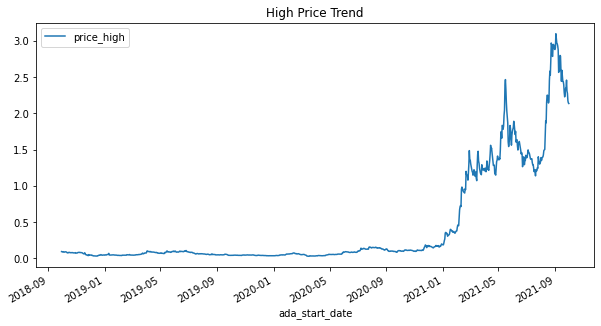

In [117]:
# High Price Trend
df_crypto_price_high_index.plot(figsize=(10,5), title="High Price Trend")


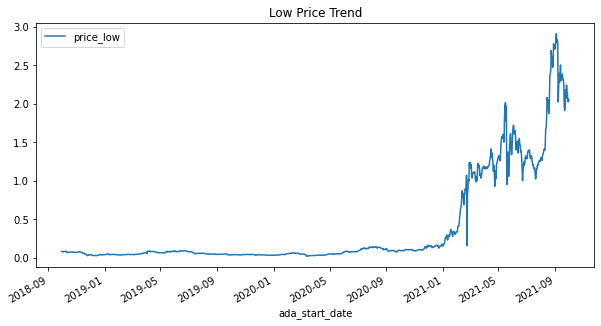

In [118]:
# Low Price Trend
df_crypto_price_low_index.plot(figsize=(10,5), title="Low Price Trend")

In [120]:
# HeatMap for Crypto - High Price
hv.extension('bokeh')
df_crypto_price_high_index.hvplot.heatmap(
    x="ada_start_date.year",
    y="ada_start_date.quarter",
    C="price_high",
    cmap ="blues"
).aggregate(function=np.mean)


Output hidden; open in https://colab.research.google.com to view.

In [121]:
# HeatMap for Crypto - Low Price
hv.extension('bokeh')
df_crypto_price_low_index.hvplot.heatmap(
    x="ada_start_date.year",
    y="ada_start_date.quarter",
    C="price_low",
    cmap = "reds"
).aggregate(function=np.mean)

Output hidden; open in https://colab.research.google.com to view.

**FORECAST**

In [122]:
# Prep the data
df_crypto_price_high_noindex_prophet = df_crypto_price_high_index.reset_index()
df_crypto_price_low_noindex_prophet = df_crypto_price_low_index.reset_index()

display(df_crypto_price_high_noindex_prophet.head())
display(df_crypto_price_low_noindex_prophet.head())

,ada_start_date,price_high
0,2018-09-30 00:00:00+00:00,0.091849
1,2018-10-01 00:00:00+00:00,0.089969
2,2018-10-02 00:00:00+00:00,0.085138
3,2018-10-03 00:00:00+00:00,0.087880
4,2018-10-04 00:00:00+00:00,0.090000


,ada_start_date,price_low
0,2018-09-30 00:00:00+00:00,0.083200
1,2018-10-01 00:00:00+00:00,0.081956
2,2018-10-02 00:00:00+00:00,0.081000
3,2018-10-03 00:00:00+00:00,0.073000
4,2018-10-04 00:00:00+00:00,0.080300


In [123]:
# rename the columnas as part of the prep-work
df_crypto_price_high_noindex_prophet.columns = ['ds', 'y']
df_crypto_price_low_noindex_prophet.columns = ['ds', 'y']

display(df_crypto_price_high_noindex_prophet.tail())
display(df_crypto_price_low_noindex_prophet.tail())

,ds,y
1085,2021-09-26 00:00:00+00:00,2.307342
1086,2021-09-27 00:00:00+00:00,2.274774
1087,2021-09-28 00:00:00+00:00,2.171694
1088,2021-09-29 00:00:00+00:00,2.143003
1089,2021-09-30 00:00:00+00:00,2.135134


,ds,y
1085,2021-09-26 00:00:00+00:00,2.151150
1086,2021-09-27 00:00:00+00:00,2.130487
1087,2021-09-28 00:00:00+00:00,2.030000
1088,2021-09-29 00:00:00+00:00,2.021986
1089,2021-09-30 00:00:00+00:00,2.052379


In [ ]:
# Are there any nulls?
df_crypto_price_high_noindex_prophet = df_crypto_price_high_noindex_prophet.dropna()
df_crypto_price_low_noindex_prophet = df_crypto_price_low_noindex_prophet.dropna()

# Remove Time Zone
df_crypto_price_high_noindex_prophet['ds'] = df_crypto_price_high_noindex_prophet['ds'].dt.tz_localize(None)
df_crypto_price_low_noindex_prophet['ds'] = df_crypto_price_low_noindex_prophet['ds'].dt.tz_localize(None)


display(df_crypto_price_high_noindex_prophet.head())
display(df_crypto_price_low_noindex_prophet.head())

display(df_crypto_price_high_noindex_prophet.tail())
display(df_crypto_price_low_noindex_prophet.tail())


In [125]:
# Create the Model
m_crypto_hp = Prophet()
m_crypto_lp = Prophet()

In [126]:
# Fit Model
m_crypto_hp.fit(df_crypto_price_high_noindex_prophet)
m_crypto_lp.fit(df_crypto_price_low_noindex_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [127]:
# Setup Predictions
future_crypto_high_price = m_crypto_hp.make_future_dataframe(periods=90, freq='D')
future_crypto_low_price = m_crypto_lp.make_future_dataframe(periods=90, freq='D')

display(future_crypto_high_price.head())
display(future_crypto_low_price.head())

display(future_crypto_high_price.tail())
display(future_crypto_low_price.tail())



,ds
0,2018-09-30
1,2018-10-01
2,2018-10-02
3,2018-10-03
4,2018-10-04


,ds
0,2018-09-30
1,2018-10-01
2,2018-10-02
3,2018-10-03
4,2018-10-04


,ds
1173,2021-12-25
1174,2021-12-26
1175,2021-12-27
1176,2021-12-28
1177,2021-12-29


,ds
1173,2021-12-25
1174,2021-12-26
1175,2021-12-27
1176,2021-12-28
1177,2021-12-29


In [128]:
# Make Predictions
forecast_crypto_hp = m_crypto_hp.predict(future_crypto_high_price)
forecast_crypto_lp = m_crypto_lp.predict(future_crypto_low_price)

display(forecast_crypto_hp.head())
display(forecast_crypto_lp.head())

display(forecast_crypto_hp.tail())
display(forecast_crypto_lp.tail())


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-09-30,0.117448,-0.123387,0.292932,0.117448,0.117448,-0.038793,-0.038793,-0.038793,0.001119,0.001119,0.001119,-0.039912,-0.039912,-0.039912,0.0,0.0,0.0,0.078656
1,2018-10-01,0.117059,-0.151327,0.284235,0.117059,0.117059,-0.039590,-0.039590,-0.039590,-0.001357,-0.001357,-0.001357,-0.038233,-0.038233,-0.038233,0.0,0.0,0.0,0.077469
2,2018-10-02,0.116670,-0.125768,0.276478,0.116670,0.116670,-0.037765,-0.037765,-0.037765,-0.001733,-0.001733,-0.001733,-0.036032,-0.036032,-0.036032,0.0,0.0,0.0,0.078905
3,2018-10-03,0.116280,-0.121035,0.288112,0.116280,0.116280,-0.035384,-0.035384,-0.035384,-0.001938,-0.001938,-0.001938,-0.033446,-0.033446,-0.033446,0.0,0.0,0.0,0.080896
4,2018-10-04,0.115891,-0.125806,0.305510,0.115891,0.115891,-0.029585,-0.029585,-0.029585,0.001026,0.001026,0.001026,-0.030611,-0.030611,-0.030611,0.0,0.0,0.0,0.086306


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-09-30,0.088857,-0.126004,0.245797,0.088857,0.088857,-0.021148,-0.021148,-0.021148,0.005719,0.005719,0.005719,-0.026867,-0.026867,-0.026867,0.0,0.0,0.0,0.067708
1,2018-10-01,0.088650,-0.125527,0.230121,0.088650,0.088650,-0.029438,-0.029438,-0.029438,-0.004613,-0.004613,-0.004613,-0.024825,-0.024825,-0.024825,0.0,0.0,0.0,0.059212
2,2018-10-02,0.088444,-0.121434,0.237088,0.088444,0.088444,-0.026160,-0.026160,-0.026160,-0.003720,-0.003720,-0.003720,-0.022440,-0.022440,-0.022440,0.0,0.0,0.0,0.062284
3,2018-10-03,0.088237,-0.113255,0.249895,0.088237,0.088237,-0.026598,-0.026598,-0.026598,-0.006759,-0.006759,-0.006759,-0.019839,-0.019839,-0.019839,0.0,0.0,0.0,0.061639
4,2018-10-04,0.088031,-0.105311,0.244064,0.088031,0.088031,-0.015670,-0.015670,-0.015670,0.001472,0.001472,0.001472,-0.017142,-0.017142,-0.017142,0.0,0.0,0.0,0.072361


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1173,2021-12-25,3.047027,2.734684,3.160973,3.014022,3.080460,-0.093707,-0.093707,-0.093707,0.001306,0.001306,0.001306,-0.095013,-0.095013,-0.095013,0.0,0.0,0.0,2.953319
1174,2021-12-26,3.054261,2.746377,3.169144,3.020438,3.088400,-0.094522,-0.094522,-0.094522,0.001119,0.001119,0.001119,-0.095641,-0.095641,-0.095641,0.0,0.0,0.0,2.959739
1175,2021-12-27,3.061496,2.754083,3.173849,3.027231,3.096515,-0.097407,-0.097407,-0.097407,-0.001357,-0.001357,-0.001357,-0.096051,-0.096051,-0.096051,0.0,0.0,0.0,2.964088
1176,2021-12-28,3.068730,2.761762,3.186596,3.033945,3.104671,-0.097968,-0.097968,-0.097968,-0.001733,-0.001733,-0.001733,-0.096235,-0.096235,-0.096235,0.0,0.0,0.0,2.970762
1177,2021-12-29,3.075965,2.762926,3.201294,3.040762,3.112317,-0.098131,-0.098131,-0.098131,-0.001938,-0.001938,-0.001938,-0.096193,-0.096193,-0.096193,0.0,0.0,0.0,2.977834


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1173,2021-12-25,2.792595,2.531913,2.896069,2.763949,2.820756,-0.071640,-0.071640,-0.071640,0.008219,0.008219,0.008219,-0.079859,-0.079859,-0.079859,0.0,0.0,0.0,2.720955
1174,2021-12-26,2.799361,2.535471,2.913295,2.770215,2.827577,-0.075369,-0.075369,-0.075369,0.005719,0.005719,0.005719,-0.081088,-0.081088,-0.081088,0.0,0.0,0.0,2.723992
1175,2021-12-27,2.806127,2.545770,2.909143,2.776277,2.834064,-0.086719,-0.086719,-0.086719,-0.004613,-0.004613,-0.004613,-0.082106,-0.082106,-0.082106,0.0,0.0,0.0,2.719408
1176,2021-12-28,2.812892,2.539989,2.914985,2.782603,2.840588,-0.086611,-0.086611,-0.086611,-0.003720,-0.003720,-0.003720,-0.082891,-0.082891,-0.082891,0.0,0.0,0.0,2.726281
1177,2021-12-29,2.819658,2.540003,2.905223,2.788906,2.847819,-0.090188,-0.090188,-0.090188,-0.006759,-0.006759,-0.006759,-0.083428,-0.083428,-0.083428,0.0,0.0,0.0,2.729471


In [129]:
# plot the forecast
hv.extension('bokeh')
m_crypto_hp.plot(forecast_crypto_hp)


Output hidden; open in https://colab.research.google.com to view.

In [130]:
# plot the forecast
hv.extension('bokeh')
m_crypto_lp.plot(forecast_crypto_lp)


Output hidden; open in https://colab.research.google.com to view.

In [131]:
forecast_crypto_hp[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1173,2021-12-25,2.953319,2.734684,3.160973
1174,2021-12-26,2.959739,2.746377,3.169144
1175,2021-12-27,2.964088,2.754083,3.173849
1176,2021-12-28,2.970762,2.761762,3.186596
1177,2021-12-29,2.977834,2.762926,3.201294


In [132]:
forecast_crypto_lp[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1173,2021-12-25,2.720955,2.531913,2.896069
1174,2021-12-26,2.723992,2.535471,2.913295
1175,2021-12-27,2.719408,2.545770,2.909143
1176,2021-12-28,2.726281,2.539989,2.914985
1177,2021-12-29,2.729471,2.540003,2.905223
